## CS-E4820 Machine Learning: Advanced Probabilistic Methods (spring 2022)

Pekka Marttinen, Prayag Tiwari, Vishnu Raj, Tianyu Cui, Yogesh Kumar, Antti Pöllänen, Louis Filstroff, Alex Aushev, Zheyang Shen, Nikitin Alexander , Sebastiaan De Peuter.


## Exercise 1, due on Tuesday 25th January at 23:50.

#### Contents
1. Problem 1: Coins
2. Problem 2: False positive paradox
3. Problem 3: Markov blanket definition

## Problem 1: Coins

There are two bent coins ($c_1$ and $c_2$) with different properties, and your objective is to guess which coin was used (i.e. the value of random variable $C \in \{c_1, c_2\}$), after learning whether the result of the coin toss (i.e. the random variable $X \in \{\mbox{h}, \mbox{t}\}$) was heads or tails.

As prior knowledge, we know the probability of each coin resulting in tails: $p(X=\mbox{t} \mid C=c_1) = \theta_1$ and $p(X=\mbox{t} \mid C=c_2) = \theta_2$.
In addition, the prior probability for using coin $c_1$ is known: $p(C=c_1) = \pi_1$.

Give the posterior probability of coin $c_1$ being used for the toss, $p(C=c_1 \mid X)$, in terms of $\theta_1$, $\theta_2$ and $\pi_1$, for both $X=\mbox{t}$ and $X=\mbox{h}$.

Furthermore, plot the posterior probability of coin $c_1$, $p(C=c_1 \mid X=\mbox{t})$, as a function of $\theta_1$, when we have $\theta_2 = 0.5$ and $\pi_1 = 0.5$.


Write your solutions in LateX or attach a picture in the answer cell provided below. You can add a picture using the command ```!(imagename_in_the_folder.jpg)```. Latex in here works similarly as you would write it normally! You can use some of the definitions from the exercise description as a reference. The list of valid Latex commands in Jypyter notebook can be found here: http://www.onemathematicalcat.org/MathJaxDocumentation/TeXSyntax.htm



With Bayes rule we get the expression

$\text{Post}_{c_1 \mid t}=p(C=c_1 \mid X=\mbox{t})
= \frac{p(X=\mbox{t} \mid C=c_1)p(C=c_1)}{p(X=\mbox{t})}
= \frac{\theta_1\pi_1}{p(X=\mbox{t})}$

Using the law of total probability we can calculate the denominator

$p(X=\mbox{t}) = \sum_i p(X=t \mid C=c_i)p(C=c_i) =
p(X=\mbox{t} \mid C=c_1)p(C=c_i1) + p(X=\mbox{t} \mid C=c_2)p(C=c_2)
= \theta_1\pi_1 + \theta_2(1-\pi_1)$

Which yileds us the expression

$\text{Post}_{c_1 \mid t}=\frac{\theta_1\pi_1}{p(X=\mbox{t})} = \frac{\theta_1\pi_1}{\theta_1\pi_1 + \theta_2(1-\pi_1)}$

To get the result for heads we use the compliment of the tail equivalents

$\text{Post}_{c_1 \mid h} 
= \frac{p(X=\mbox{h} \mid C=c_1)p(C=c_1)}{p(X=\mbox{h})}
= \frac{(1-p(X=\mbox{t} \mid C=c_1))p(C=c_1)}{(1-p(X=\mbox{t}))}
= \frac{(1-\theta_1)\pi_1}{1-(\theta_1\pi_1 + \theta_2(1-\pi_1))}$

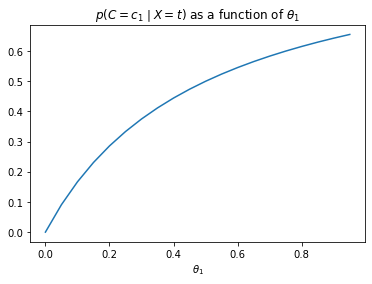

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# define some variables:
theta_2 = 0.5
pi_1 = 0.5

# compute posterior probability of c_1
theta_1 = np.arange(0.0, 1.0, 0.05)
post_c1 = [(x*pi_1)/(x*pi_1+theta_2*(1-pi_1)) for x in theta_1]


# plot the result
plt.plot(theta_1, post_c1)
plt.title('$p(C = c_1 \\mid X = t)$ as a function of $\\theta_1$')
plt.xlabel('$\\theta_1$')
plt.show()

## Problem 2: False positive paradox

Consider a hypothetical lie detector that is ''fairly reliable'', in the sense that it will correctly detect 98\% of all lies, and also classify as true 98\% of all statements that are actually true.
This lie detector is being used in an attempt to detect academic dishonesty, by asking ''did you cheat?'' from all students participating in an exam of a machine learning course.
(This example is still hypothetical.)

For the purposes of this question, assume as prior knowledge that there are 300 students taking the exam, and a single student has chosen to cheat.
We will further assume that all students deny having cheated. 
If the detector now flags a particular student X as a cheater, how likely is it that X has, in fact, cheated in the exam?

Write your solutions in LateX or attach a picture in the answer cell provided below. 




$p(cheater) = p(c) = \frac{1}{300}$

$p(Detected Lie \mid Lie) = p(DL \mid L) = 0.98$

$p(Detected Truth \mid Truth) = p(DT \mid T) = 0.98$

We want to know $p(Lie \mid DetectedLie)=p(L \mid DL)$

$p(L \mid DL) = \frac{p(DL \mid L)p(L)}{p(DL}$

In ourcase, the only lier will be the cheater so p(c)=p(L)

$\frac{p(DL \mid L)p(c)}{p(DL}$

We can get $p(DL)$ with the law of total probability: 
$p(DL)
= p(DL \mid L)p(L) + p(DL \mid T)p(T) 
= p(DL \mid L)p(c) + p(DL \mid T)(1-p(c))
= p(DL \mid L)p(c) + ((1-p(DT \mid T))(1-p(c))$

This gives us the expression
$\frac{p(DL \mid L)p(c)}{p(DL \mid L)p(c) + ((1-p(DT \mid T))(1-p(c))}
= \frac{0.98*\frac{1}{300}}{0.98*\frac{1}{300} + 0.02*\frac{299}{300}}$

In [19]:
(0.98*1/300)/(0.98*1/300 + 0.02*299/300)

0.1408045977011494

We get the answer $p(L \mid DL)\approx 14\%$

## Problem 3: Markov blanket definition
Consider the Bayesian network in below. What is the Markov blanket of each variable? (see Barber: [Bayesian Reasoning and Machine Learning](http://web4.cs.ucl.ac.uk/staff/D.Barber/pmwiki/pmwiki.php?n=Brml.Online), ch. 2.1, Definition 2.5)

![](markov.png)
Define Markov blanket for each variable $A,B,C,D,E,F$. You answer should list the nodes that form the Markov blanket for each node. For example, for node A, your answer should look like so $A = \{B, D, E\}$

Correct A: $A= \{B, C, D, F\}$

YOUR ANSWER HERE

$B = \{C, E, A, D, F \}$

$C = \{B, A, D \}$ 

$D = \{A, B, C, E, F \}$ 

$E = \{B, D, F \}$ 

$F = \{A, E, D, B \}$

The nodes themselves have been left out since both the example above and the books example have left them. Additionally, the 2020 version of the book states <em>"The Markov blanket of a node is its parents, children and the parents
of its children __(excluding itself)__"</em>